In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import wrds
import psycopg2
from scipy.stats import norm
from IPython.display import display


In [2]:
db  = wrds.Connection(wrds = "grimaux")

Enter your WRDS username [Pierre-Benoit]:grimaux
Enter your password:········
WRDS recommends setting up a .pgpass file.
Create .pgpass file now [y/n]?: y
Created .pgpass file successfully.
Loading library list...
Done


# Exercise 1

In [3]:
# get data for Apple, General Electrics, 
# Goldman Sachs, Microsoft, and Procter & Gamble
aapl = db.raw_sql("""
    select date, ret 
    from crsp.dsf 
    where permco in (7) 
    and date>='1999-12-31' 
    and date<='2021-12-31'
        """)


msft = db.raw_sql("""
    select date, ret 
    from crsp.dsf 
    where permco in (8048) 
    and date>='1999-12-31' 
    and date<='2021-12-31'
        """)
pg = db.raw_sql("""
    select date, ret 
    from crsp.dsf 
    where permco in (21446) 
    and date>='1999-12-31' 
    and date<='2021-12-31'
        """)
ge = db.raw_sql("""
    select date, ret 
    from crsp.dsf 
    where permco in (20792) 
    and date>='1999-12-31' 
    and date<='2021-12-31'
        """)
gs = db.raw_sql("""
    select date, ret 
    from crsp.dsf 
    where permco in (35048) 
    and date>='1999-12-31' 
    and date<='2021-12-31'
        """)

In [4]:
def expected_cond_shortfall(Var_p, mean , std , approx_norm):
    return mean - std*std* (approx_norm.pdf(Var_p)/(approx_norm.cdf(Var_p)))

In [5]:
# daily_return : pandas series of daily simple return
def exo_1( daily_return, bins, isStock=True) :
    
    #a
    print("Statistic for daily simple return annualized")
    
    #b

    n, list_bins, patches = plt.hist(daily_return["ret"], bins = bins, density = True)
    
    min_plot, max_plot = (-daily_return["ret"].std()*4, daily_return["ret"].std()*4)
    x = np.arange(min_plot,max_plot, 0.001)
    approx_norm = norm(loc = daily_return["ret"].mean(),
                       scale =daily_return["ret"].std())
    plt.plot(x,  approx_norm.pdf(x))
    
    winsorized = daily_return[daily_return['ret'].abs()<0.04]
    display(
        pd.DataFrame(index = ["mean", "var"],
                 data = { "data" : [252*daily_return["ret"].mean(),
                                   252*daily_return['ret'].var()],
                         "winsorized data" : [252*winsorized["ret"].mean(),252*winsorized["ret"].var()]
                       }))
    approx_win_norm = norm(loc = winsorized["ret"].mean(),
                           scale =winsorized["ret"].std())
    plt.plot(x,  approx_win_norm.pdf(x))
    
    plt.axis((min_plot,max_plot,0,n.max()*1.11))
    
    plt.title("empirical density funtcion")
    #c
    if isStock:

        #value at risk
        VaR95_emp = daily_return['ret'].quantile(0.05)
        VaR99_emp = daily_return['ret'].quantile(0.01)

        VaR95_norm  = approx_norm.ppf(0.05)
        VaR99_norm = approx_norm.ppf(0.01)
        
        print('Value at Risk and Conditional Expected Shortfall are Annualized. However, the plot is not with Annualized data')

        stat = pd.DataFrame( index  =  ["Value at Risk 95%","Conditional Expected Shortfall 95%",
                           'Value at Risk 99%', "Condiational Expected Shortfall 99%"],
                 data = {
                     'Empirical' : [252*VaR95_emp
                                         ,252*(daily_return[daily_return['ret']<VaR95_emp]).mean()[0]
                                        ,252*VaR99_emp
                                        ,252*(daily_return[daily_return['ret']<VaR99_emp]).mean()[0]]
                    ,'Normal distribution' : [VaR95_norm*252
                                            , 252*expected_cond_shortfall(VaR95_norm, daily_return["ret"].mean() , daily_return["ret"].std() , approx_norm)
                                            ,VaR99_norm*252
                                            , 252*expected_cond_shortfall(VaR99_norm, daily_return["ret"].mean() , daily_return["ret"].std() , approx_norm)]

                         })
        display(stat)



# APPLE

Statistic for daily simple return annualized


,data,winsorized data
mean,0.331792,0.239702
var,0.160791,0.065036


Value at Risk and Conditional Expected Shortfall are Annualized. However, the plot is not with Annualized data


C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR95_emp]).mean()[0]
C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR99_emp]).mean()[0]]


,Empirical,Normal distribution
Value at Risk 95%,-9.278820,-10.138497
Conditional Expected Shortfall 95%,-14.154751,-12.798372
Value at Risk 99%,-16.134113,-14.476537
Condiational Expected Shortfall 99%,-23.546323,-16.633585


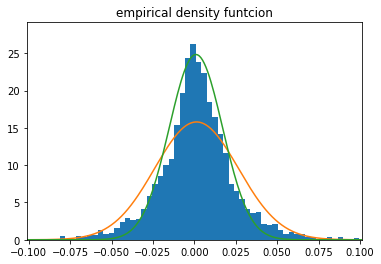

In [6]:
exo_1(aapl, 200)

# Microsoft

Statistic for daily simple return annualized


,data,winsorized data
mean,0.146788,0.126458
var,0.093223,0.048269


Value at Risk and Conditional Expected Shortfall are Annualized. However, the plot is not with Annualized data


C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR95_emp]).mean()[0]
C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR99_emp]).mean()[0]]


,Empirical,Normal distribution
Value at Risk 95%,-7.124278,-7.825624
Conditional Expected Shortfall 95%,-11.183745,-9.850938
Value at Risk 99%,-13.671212,-11.128746
Condiational Expected Shortfall 99%,-19.041607,-12.771192


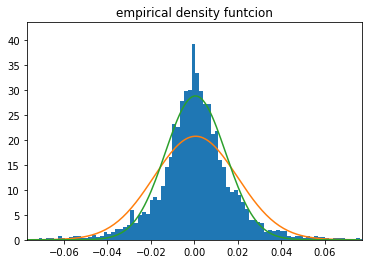

In [7]:
exo_1(msft, 200)

# Procter & Gamble 

Statistic for daily simple return annualized


,data,winsorized data
mean,0.099884,0.104875
var,0.045626,0.027304


Value at Risk and Conditional Expected Shortfall are Annualized. However, the plot is not with Annualized data


C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR95_emp]).mean()[0]
C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR99_emp]).mean()[0]]


,Empirical,Normal distribution
Value at Risk 95%,-4.410368,-5.477524
Conditional Expected Shortfall 95%,-7.865528,-6.894410
Value at Risk 99%,-8.924073,-7.788350
Condiational Expected Shortfall 99%,-14.556916,-8.937386


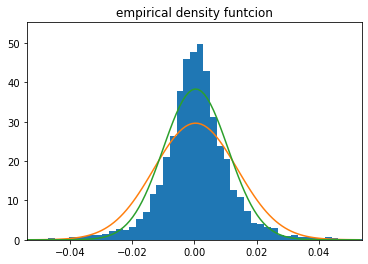

In [8]:
exo_1(pg, 200)

# General Electrics

Statistic for daily simple return annualized


,data,winsorized data
mean,0.017581,-0.016636
var,0.112574,0.050675


Value at Risk and Conditional Expected Shortfall are Annualized. However, the plot is not with Annualized data


C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR95_emp]).mean()[0]
C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR99_emp]).mean()[0]]


,Empirical,Normal distribution
Value at Risk 95%,-7.894701,-8.743282
Conditional Expected Shortfall 95%,-12.544830,-10.968895
Value at Risk 99%,-15.246076,-12.373076
Condiational Expected Shortfall 99%,-21.008738,-14.177955


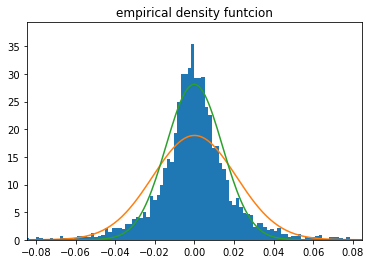

In [9]:
exo_1(ge, 200)

# Goldman Sachs

Statistic for daily simple return annualized


,data,winsorized data
mean,0.144613,0.095305
var,0.136953,0.058680


Value at Risk and Conditional Expected Shortfall are Annualized. However, the plot is not with Annualized data


C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:47: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR95_emp]).mean()[0]
C:\Users\Pierre-Benoit\AppData\Local\Temp\ipykernel_8688\1556063120.py:49: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ,252*(daily_return[daily_return['ret']<VaR99_emp]).mean()[0]]


,Empirical,Normal distribution
Value at Risk 95%,-8.439665,-9.518421
Conditional Expected Shortfall 95%,-13.110689,-11.973221
Value at Risk 99%,-15.744604,-13.522000
Condiational Expected Shortfall 99%,-22.823784,-15.512740


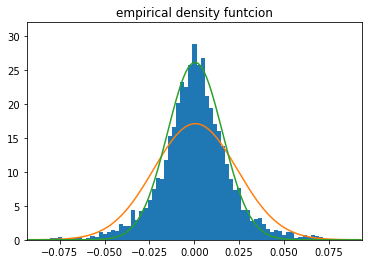

In [10]:
exo_1(gs, 200)

# d)

From our results, we observe that the normal distribution is a first step in the approximation of the daily retunr but it does not seems to work so well because the daily return have a fat tail. However, considering assumption like the winsorized normal distribution, we obtain something that fit better the data. The normal distribution does not approximates well extremal values of the daily return, this is highlighted by the difference between the two Value at risk and their associated expected Shortfall. The difference between these two is bigger when values are more extrem.

# Bonds

In [11]:
bond_2y = db.raw_sql("""
    select caldt, b2ret
    from crsp.mcti
    where caldt >= '1999-12-31'
    and caldt <= '2021-12-31' """, date_cols = ['caldt'])
bond_2y = bond_2y.rename(
    columns ={"caldt" : "date", "b2ret" :"ret" })
bond_10y  = db.raw_sql("""
    select caldt, b10ret
    from crsp.mcti
    where caldt >= '1999-12-31'
    and caldt <= '2021-12-31' """, date_cols = ['caldt'])
bond_10y = bond_10y.rename(
    columns ={"caldt" : "date", "b10ret" :"ret" })

Statistic for daily simple return annualized


,data,winsorized data
mean,0.588502,0.588502
var,0.005519,0.005519


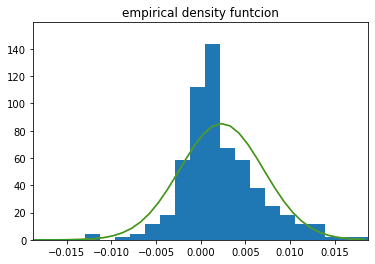

In [12]:
exo_1(bond_2y, 20, isStock=False)

Statistic for daily simple return annualized


,data,winsorized data
mean,1.080921,0.885097
var,0.096879,0.068661


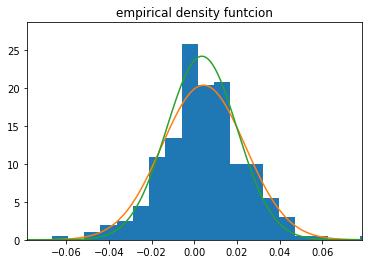

In [13]:
exo_1(bond_10y, 20, isStock=False)

It is hard to conclude about this part because there is not enough data and the empirical distribution is hard to draw.
Noting that, the normal distribution does not seem to fit well the return for bond. For the two yeas bond, the peak is not high enough and the gaussian is too flat. Moreover we can see that there is extremal values that are too high in comparison to the gaussian distribution, it can be explained by the fact that these values are not randomly choose by the central bank.
